In [7]:
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
from scipy import signal
import soundfile

In [8]:
Fs = 16000
Ts = 0.01   # 10 ms shift size
Tf = 0.02   # 20 ms frame size
Ns = int(Fs*Ts)    # shift number of samples
Nf = int(Fs*Tf)    # frame number of samples
cmap_plot = plt.cm.bone_r

In [9]:
wavefile = 'D:/YYN/audio_/digitrec/segmented/YouYeNa/3/kdigits0-3.wav'
x , sr = librosa.load(wavefile , sr=16000)
# 목소리 나오는 부분
x = x[int(Fs*0.5):int(Fs*1.5)]
print(x.shape)

(16000,)


In [10]:
# LPF
a = signal.firwin(51, 0.5, window='hamming',pass_zero='lowpass')
x1 = signal.lfilter(a, [1.0], x)
print(x1.shape)
## Downsampling ##
# 8k:2, 11k:1.45
ratio = 2
x2 = np.zeros(int(len(x1)/ratio))
for i in range(int(len(x1)/ratio)):
    x2[i] = x1[ratio*i]
print(x2.shape)

(16000,)
(8000,)


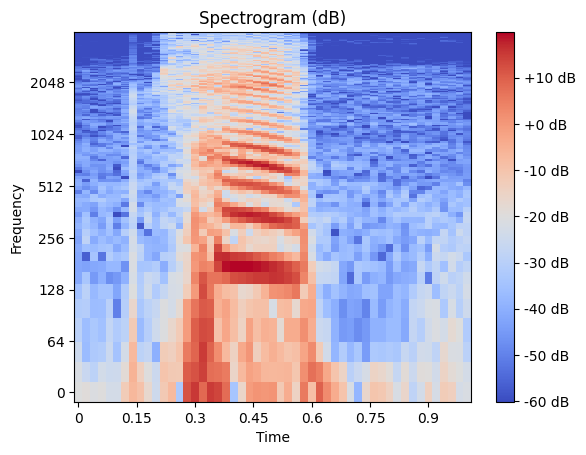

In [11]:
# stft
stft = librosa.stft(x2, n_fft=Nf, hop_length=Ns)
magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

# plot
plt.figure()
librosa.display.specshow(log_spectrogram, sr=Fs/ratio, hop_length=Ns, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")
plt.show()

soundfile.write('D:/YYN/audio_/resample/8.wav',x2,sr)